In [1]:
import numpy as np
from sympy import *
import networkx as nx

Choose $N, K$ and $M$. We compute $S$ = nb of states (=cardinal of state-space) and `users`=iterator over set of users.

In [2]:
N = 2 # nb users
users = range(N)
K = 2
M = 2
S = (K+1)**2 * (M+1)**2

Create $\lambda$s and $\mu$s.

In [3]:
lambd = { 0:Symbol('La'), 1:Symbol('Lb')}
mu = { 0:Symbol('Ma'), 1:Symbol('Mb')}

We define the transition rate from a state `start` to a state `end`.

In [4]:
def transition_rate(start, end):

    # get init values of walls and newsfeeds
    w0, n0, w1, n1 = start[0], start[1], start[2], start[3]
    
    # movement
    z = list(np.array(end) - np.array(start))
    
    # case w0 +1
    if z == [1,0,0,0]:
        return (lambd[0] + mu[0]*n0/M) * (1-w0/K) * n1/M
    # case n1 +1
    elif z == [0,0,0,1]:
        return (lambd[0] + mu[0]*n0/M)  * w0/K * (1-n1/M)
    # case w0 +1 & n1 +1
    elif z == [1,0,0,1]:
        return (lambd[0] + mu[0]*n0/M) * (1-w0/K) * (1-n1/M)
    
    # case w0 -1
    elif z == [-1,0,0,0]:
        return mu[0] * (1-n0/M) * w0/K * (1-n1/M)
    # case n1 -1
    elif z == [0,0,0,-1]:
        return mu[0] * (1-n0/M) * (1-w0/K) * n1/M
    # case w0 -1 & n1 -1
    elif z == [-1,0,0,-1]:
        return mu[0] * (1-n0/M) * w0/K * n1/M
    
    # case w1 +1
    elif z == [0,0,1,0]:
        return mu[1] * n1/M * (1-w1/K) * n0/M
    # case n0 +1
    elif z == [0,1,0,0]:
        return mu[1] * n1/M * w1/K * (1-n0/M)
    # case w1 +1 & n0 +1
    elif z == [0,1,1,0]:
        return mu[1] * n1/M * (1-w1/K) * (1-n0/M)
        
    # case w1 -1
    elif z == [0,0,-1,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * w1/K * (1-n0/M)
    # case n0 -1
    elif z == [0,-1,0,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * (1-w1/K) * n0/M
    # case w1 -1
    elif z == [0,-1,-1,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * w1/K * n0/M
        
    # otherwise rate=0
    else:
        return 0

Create $Q$ (rate matrix). Make a copy as $Q_{theo}$ to keep original expressions.

In [5]:
Q = list()
for k1 in range(K+1):
    for k2 in range(M+1):
        for m2 in range(K+1):
            for m1 in range(M+1):
                Q.append(list())
                for k1_ in range(K+1):
                    for k2_ in range(M+1):
                        for m2_ in range(K+1):
                            for m1_ in range(M+1):
                                Q[-1].append(Symbol('q_%d%d%d%d^%d%d%d%d'%(k1, m1, k2, m2, k1_, m1_, k2_, m2_)))
Q = Matrix(Q)
Q_theo = Matrix(Q)

Fill $Q$ matrix with transition rates.

In [6]:
# iterate over Q matrix
for i in range(S):
    for j in range(S):
    
        # x=start, y=end
        x = [ int(xi) for xi in Q[i,j].name[2:6] ]
        y = [ int(yi) for yi in Q[i,j].name[-4:] ]

        # compute transition rate
        expr = transition_rate(x, y)
    
        # put new value in Q
        Q[i,j] = simplify(expr)
        
# now add diagonal values
for i in range(S):
    Q[i,i] = simplify(-sum(Q[i,:]))

In [7]:
for i,q in enumerate(Q):
    if q != 0:
        print(Q_theo[i], q)

q_0000^0000 -1.0*La
q_0000^1001 1.0*La
q_0100^0000 0.5*Lb + 0.5*Mb
q_0100^0100 -1.0*La - 0.5*Lb - 0.5*Ma - 0.5*Mb
q_0100^1101 1.0*La + 0.5*Ma
q_0200^0100 Lb + Mb
q_0200^0200 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0200^1201 1.0*La + 1.0*Ma
q_0001^0000 0.5*Ma
q_0001^0001 -1.0*La - 0.5*Ma - 0.5*Mb
q_0001^0111 0.5*Mb
q_0001^1001 0.5*La
q_0001^1002 0.5*La
q_0101^0100 0.25*Ma
q_0101^0001 0.5*Lb + 0.25*Mb
q_0101^0101 -1.0*La - 0.5*Lb - 0.75*Ma - 0.75*Mb
q_0101^0111 0.25*Mb
q_0101^0211 0.25*Mb
q_0101^1101 0.5*La + 0.25*Ma
q_0101^1102 0.5*La + 0.25*Ma
q_0201^0101 Lb + Mb/2
q_0201^0201 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0201^0211 0.5*Mb
q_0201^1201 0.5*La + 0.5*Ma
q_0201^1202 0.5*La + 0.5*Ma
q_0002^0001 1.0*Ma
q_0002^0002 -1.0*La - 1.0*Ma - 1.0*Mb
q_0002^0112 1.0*Mb
q_0002^1002 1.0*La
q_0102^0101 0.5*Ma
q_0102^0002 0.5*Lb
q_0102^0102 -La - 0.5*Lb - 1.0*Ma - 1.0*Mb
q_0102^0112 0.5*Mb
q_0102^0212 0.5*Mb
q_0102^1102 La + Ma/2
q_0202^0102 1.0*Lb
q_0202^0202 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0202^

Create $U$ (vector of stationary probability).

In [8]:
U = list()    
for k1 in range(K+1):
    for k2 in range(M+1):
        for m2 in range(K+1):
            for m1 in range(M+1):
                U.append(Symbol('Pi_%d%d%d%d'%(k1, m1, k2, m2)))
# U = Matrix([U])

In [9]:
U

[Pi_0000,
 Pi_0100,
 Pi_0200,
 Pi_0001,
 Pi_0101,
 Pi_0201,
 Pi_0002,
 Pi_0102,
 Pi_0202,
 Pi_0010,
 Pi_0110,
 Pi_0210,
 Pi_0011,
 Pi_0111,
 Pi_0211,
 Pi_0012,
 Pi_0112,
 Pi_0212,
 Pi_0020,
 Pi_0120,
 Pi_0220,
 Pi_0021,
 Pi_0121,
 Pi_0221,
 Pi_0022,
 Pi_0122,
 Pi_0222,
 Pi_1000,
 Pi_1100,
 Pi_1200,
 Pi_1001,
 Pi_1101,
 Pi_1201,
 Pi_1002,
 Pi_1102,
 Pi_1202,
 Pi_1010,
 Pi_1110,
 Pi_1210,
 Pi_1011,
 Pi_1111,
 Pi_1211,
 Pi_1012,
 Pi_1112,
 Pi_1212,
 Pi_1020,
 Pi_1120,
 Pi_1220,
 Pi_1021,
 Pi_1121,
 Pi_1221,
 Pi_1022,
 Pi_1122,
 Pi_1222,
 Pi_2000,
 Pi_2100,
 Pi_2200,
 Pi_2001,
 Pi_2101,
 Pi_2201,
 Pi_2002,
 Pi_2102,
 Pi_2202,
 Pi_2010,
 Pi_2110,
 Pi_2210,
 Pi_2011,
 Pi_2111,
 Pi_2211,
 Pi_2012,
 Pi_2112,
 Pi_2212,
 Pi_2020,
 Pi_2120,
 Pi_2220,
 Pi_2021,
 Pi_2121,
 Pi_2221,
 Pi_2022,
 Pi_2122,
 Pi_2222]

Define $Q_{aug}$ as $Q^T$ with row $(1, ...,1)$ added at the end, and $b=(0,...,0,1)^T$ so that we can resolve $Q_{aug}U^T=b$ (equivalent $UQ_{aug}=b$) instead of $\left\{UQ=0, Ue=1\right\}$. 

**Important :** $Q$ is overranked so we delete $Q_{aug}$'s first line and the first line of $b$.

In [27]:
Q_aug = Q.T[1:,:]
Q_aug = Q_aug.row_insert(S-1, Matrix([[1]*S]))
b = Matrix([0]*S + [1])
b = b[1:,:]

Solve $Q_{aug}U^T=b$.

In [28]:
sol = linsolve((Q_aug, b), U)

In [30]:
for S in sol:
    for i,s in enumerate(S):
        print(U[i], s)

Pi_0000 1.0*Lb*Ma/(La*Lb + La*Mb + Lb*Ma)
Pi_0100 0
Pi_0001 0
Pi_0101 0
Pi_0010 0
Pi_0110 0
Pi_0011 0
Pi_0111 0
Pi_1000 0
Pi_1100 0
Pi_1001 1.0*La*Lb/(La*Lb + La*Mb + Lb*Ma)
Pi_1101 0
Pi_1010 0
Pi_1110 0
Pi_1011 0
Pi_1111 1.0*La*Mb/(La*Lb + La*Mb + Lb*Ma)


## Graphe

In [10]:
G = nx.DiGraph()

In [11]:
for i in range(Q_theo.shape[0]):
    for j in range(Q_theo.shape[1]):
        if Q[i,j] != 0:
            u = Q_theo[i,j].name[2:6]
            v = Q_theo[i,j].name[-4:]
            weight = Q[i,j]
            G.add_edge(u, v, weight=weight)

In [42]:
for scc in nx.strongly_connected_components(G):
    print(scc)

{'0120', '0100', '0011', '2211', '1101', '1122', '2221', '1222', '1102', '1211', '0010', '1111', '2101', '1000', '1112', '2011', '0121', '1100', '0111', '2012', '0001', '1001', '1212', '2112', '2002', '1110', '1121', '0211', '2122', '2001', '2111', '2102', '1011', '2212', '2222', '0110', '0221', '0101', '1002', '1012', '1010', '0000', '1221', '2121', '1120'}
{'2202'}
{'1202'}
{'2201'}
{'1201'}
{'0200'}
{'0201'}
{'0112', '0212', '0002', '0122', '0012', '0102', '0222'}
{'0202'}
{'0210'}
{'2021', '1020', '0021', '1021', '2022', '0020', '1022'}
{'0220'}
{'0022'}
{'1200'}
{'1210'}
{'1220'}
{'2000'}
{'2100'}
{'2200'}
{'2010'}
{'2110'}
{'2210'}
{'2020'}
{'2120'}
{'2220'}


{'0000': Text(1.0, -4.139211640108442e-09, '0000'),
 '1001': Text(0.9969929456710815, 0.07749241590499878, '1001'),
 '0100': Text(0.9879898428916931, 0.15451879799365997, '0100'),
 '1101': Text(0.9730448722839355, 0.23061586916446686, '1101'),
 '0200': Text(0.9522478580474854, 0.30532601475715637, '0200'),
 '1201': Text(0.9257239699363708, 0.37819984555244446, '1201'),
 '0001': Text(0.8936326503753662, 0.448799192905426, '0001'),
 '0111': Text(0.8561668992042542, 0.5166993737220764, '0111'),
 '1002': Text(0.8135520815849304, 0.5814920663833618, '1002'),
 '0101': Text(0.7660444378852844, 0.6427875757217407, '0101'),
 '0211': Text(0.7139297127723694, 0.7002173662185669, '0211'),
 '1102': Text(0.6575213670730591, 0.7534359097480774, '1102'),
 '0201': Text(0.5971586108207703, 0.8021231889724731, '0201'),
 '1202': Text(0.5332044363021851, 0.8459864258766174, '1202'),
 '0002': Text(0.46604350209236145, 0.8847618103027344, '0002'),
 '0112': Text(0.3960797190666199, 0.9182161092758179, '0112')

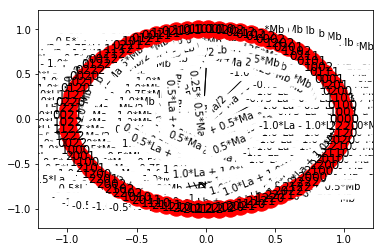

In [17]:
edge_labels = { e: G.edges[e]['weight'] for e in G.edges }
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos)

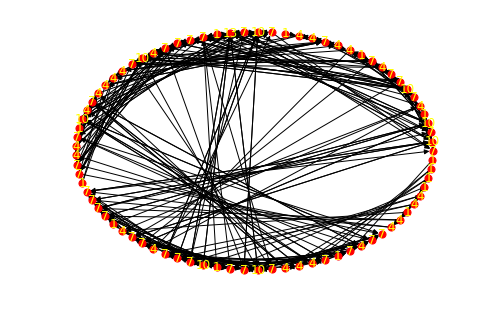

In [25]:
nx.draw_shell(G, node_size=50, font_color='yellow', labels={n:G.in_degree(n) for n in G.nodes})

In [31]:
indeg = {n: G.in_degree(n) for n in G.nodes}
outdeg = {n: G.out_degree(n) for n in G.nodes}

In [32]:
set(indeg.values())

{1, 4, 7, 10, 13}

In [33]:
set(outdeg.values())

{2, 3, 4, 5, 6, 7, 8, 9, 10, 13}

In [38]:
leaders = {n: set(G.predecessors(n)) for n in G.nodes}
followers = {n: set(G.successors(n)) for n in G.nodes}

In [41]:
for n in G.nodes:
    for m in G.nodes:
        if n!=m:
            if leaders[n] == leaders[m] and followers[n] == followers[m]:
                print(n,m)

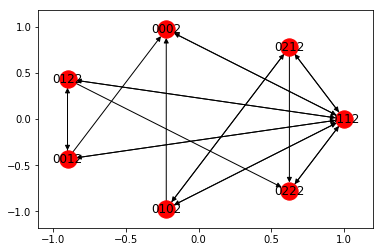

In [46]:
for g in nx.strongly_connected_component_subgraphs(G):
    if g.number_of_nodes() == 7:
        edge_labels = { e: g.edges[e]['weight'] for e in g.edges }
        pos = nx.shell_layout(g)
        nx.draw_networkx_nodes(g, pos)
        nx.draw_networkx_edges(g, pos)
#         nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(g, pos)
        break